In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df=pd.read_csv('Elon_musk.csv',encoding='latin')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data] 

True

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
df['len']=df['Text'].apply(len)
df

,Text,len
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",144
1995,@PPathole Make sure to read ur terms &amp; con...,77
1996,@TeslaGong @PPathole Samwise Gamgee,35
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,59


In [6]:
df['len'].describe()

count    1999.000000
mean       78.442721
std        44.617029
min         3.000000
25%        39.000000
50%        68.000000
75%       129.000000
max       191.000000
Name: len, dtype: float64

In [7]:
import string

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
from nltk.corpus import stopwords

In [10]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer,word_tokenize

In [12]:
stem=PorterStemmer()
lem=WordNetLemmatizer()

In [13]:
def cleanword(title):
  clean_text= [x for x in title if x not in string.punctuation]
  clean_text= ''.join(clean_text)
  clean_text= [x for x in clean_text.split() if x.lower() not in stopwords.words('english')]
  clean_text= [x for x in clean_text if not x.isdigit()]
  clean_text= [stem.stem(x) for x in clean_text]
  clean_text= [lem.lemmatize(x,pos='v') for x in clean_text]
  return clean_text

In [14]:
stem.stem('drunker')

'drunker'

In [15]:
lem.lemmatize('good',pos='a')

'good'

In [16]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [17]:
count= CountVectorizer(ngram_range=(1,1))

In [18]:
x= count.fit_transform(df)

In [19]:
print((df.ge))

<bound method flex_comp_method_FRAME.<locals>.f of                                                    Text  len
0                                @kunalb11 Im an alien   22
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   82
2                   @joerogan @Spotify Great interview!   35
3                       @gtera27 Doge is underestimated   31
4     @teslacn Congratulations Tesla China for amazi...  104
...                                                 ...  ...
1994  @flcnhvy True, it sounds so surreal, but the n...  144
1995  @PPathole Make sure to read ur terms &amp; con...   77
1996                @TeslaGong @PPathole Samwise Gamgee   35
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   59
1998                          Progress update August 28   25

[1999 rows x 2 columns]>


In [20]:
x.toarray()

array([[0, 1],
       [1, 0]], dtype=int64)

In [21]:
tfidf= TfidfTransformer()

In [22]:
tf_idf= tfidf.fit_transform(x)

In [23]:
tf_idf.toarray()

array([[0., 1.],
       [1., 0.]])

In [24]:
count= CountVectorizer(ngram_range=(1,1),analyzer=cleanword)

In [25]:
x= count.fit_transform(df['Text'])

In [26]:
print(count.get_feature_names_out())

['100kg' '100m' '10pm' ... 'à' 'ð' 'ðogecoin']


In [27]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
tf_idf= tfidf.fit_transform(x)

In [29]:
tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [31]:
rand= RandomForestClassifier()

In [32]:
rand.fit(tf_idf,df['len'])

RandomForestClassifier()

In [33]:
y_pred= rand.predict(tf_idf)
y_pred

array([22, 82, 35, ..., 35, 59, 25], dtype=int64)

In [34]:
accuracy_score(df['len'],y_pred)

1.0

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [36]:
pipeline= Pipeline([('count',CountVectorizer(ngram_range=(3,3),analyzer=cleanword)),('tfidf',TfidfTransformer()),('rand',RandomForestClassifier())])

In [37]:
x_train,x_test,y_train,y_test= train_test_split(df['Text'],df['len'],train_size=0.75,random_state=100)

In [38]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('count',
                 CountVectorizer(analyzer=<function cleanword at 0x000001BBAE8BB920>,
                                 ngram_range=(3, 3))),
                ('tfidf', TfidfTransformer()),
                ('rand', RandomForestClassifier())])

In [39]:
y_pred= pipeline.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred)

0.12

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          11       0.50      0.50      0.50         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         2
          16       0.25      0.14      0.18         7
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3
          19       0.40      0.20      0.27        10
          20       0.00      0.00      0.00         7
          21       0.09      0.33      0.14         3
          22       0.00      0.00      0.00         6
          23       0.00      0.00      0.00         8
          24       0.00      0.00      0.00         6
          25       0.00      0.00      0.00         4
          26       0.00    

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\

In [42]:
!pip install spacy
!pip install wordcloud
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 325.1 kB/s eta 0:00:40
     --------------------------------------- 0.0/12.8 MB 326.8 kB/s eta 0:00:40
     --------------------------------------- 0.1/12.8 MB 363.1 kB/s eta 0:00:36
     --------------------------------------- 0.1/12.8 MB 514.3 kB/s eta 0:00:25
      -------------------------------------- 0.2/12.8 MB 689.9 kB/s eta 0:00:19
      -------------------------------------- 0.3/12.8 MB 803.7 kB/s eta 0:00:16
      -------------------------------------- 0.3/12.8 MB 824.9 kB/s eta 0:00:16
     - ------------------------------------- 0.4/12.8 MB 880.6 kB/s eta 0:00:15
     - ------------------------------------- 0.5/12.8 MB 907.9 kB/s eta 0:00:14
     - ------------------------------------- 0.5/12.8 MB 885.4 kB/s eta 0:00:14
     - ------------------------------------- 0.5/12.8 MB

In [43]:
!pip install spacy
!pip install wordcloud
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 131.3 kB/s eta 0:01:38
     --------------------------------------- 0.0/12.8 MB 131.3 kB/s eta 0:01:38
     --------------------------------------- 0.1/12.8 MB 201.8 kB/s eta 0:01:04
     --------------------------------------- 0.1/12.8 MB 463.7 kB/s eta 0:00:28
      -------------------------------------- 0.3/12.8 MB 820.5 kB/s eta 0:00:16
     - -------------------------------------- 0.6/12.8 MB 1.7 MB/s eta 0:00:08
     --- ------------------------------------ 1.1/12.8 MB 2.5 MB/s eta 0:00:05
     ---- ----------------------------------- 1.4/12.8 MB 2.9 MB/s eta 0:00:04
     ---- ----------------------------------- 1.5/12.8 MB 3.0 MB/s eta 0:00:04
     ------ --------------------------------- 2.1/12.8 MB 3.6 MB/s e

In [44]:
!pip install textblob

In [45]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df.head()

,Text,len,subjectivity,polarity
0,@kunalb11 Im an alien,22,0.750000,-0.250000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82,0.000000,0.000000
2,@joerogan @Spotify Great interview!,35,0.750000,1.000000
3,@gtera27 Doge is underestimated,31,0.000000,0.000000
4,@teslacn Congratulations Tesla China for amazi...,104,0.366667,0.345313


In [46]:
from textblob import TextBlob

In [47]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
df["analysis"] = df["polarity"].apply(analysis)

In [48]:
positive_df = df[df['analysis'] == 'Positive']
negative_df= df[df['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_df[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_df[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -@joerogan @Spotify Great interview!
 -@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! https://t.co/9WFKMYu2oj
 -@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
 -The most entertaining outcome is the most likely
negative tweets
 -@kunalb11 Im an alien
 -@freewalletorg Your app sucks
 -@RationalEtienne @Adamklotz_ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don https://t.co/9Z8Ac6skqx
 -@RationalEtienne @Adamklotz_ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or https://t.co/7J1c92hdjl
 -@SRuhle Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.


In [61]:
df=[Text.strip() for Text in df.Text] # remove the spaces in the paragraph
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [62]:
text=''.join(df)
text

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [53]:
from wordcloud import WordCloud

In [54]:
def pair_plot(wordcloud):
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis('off')

In [69]:
wordcloud= WordCloud(width=1000,height=1000,background_color='black',colormap='Set2').generate(text)

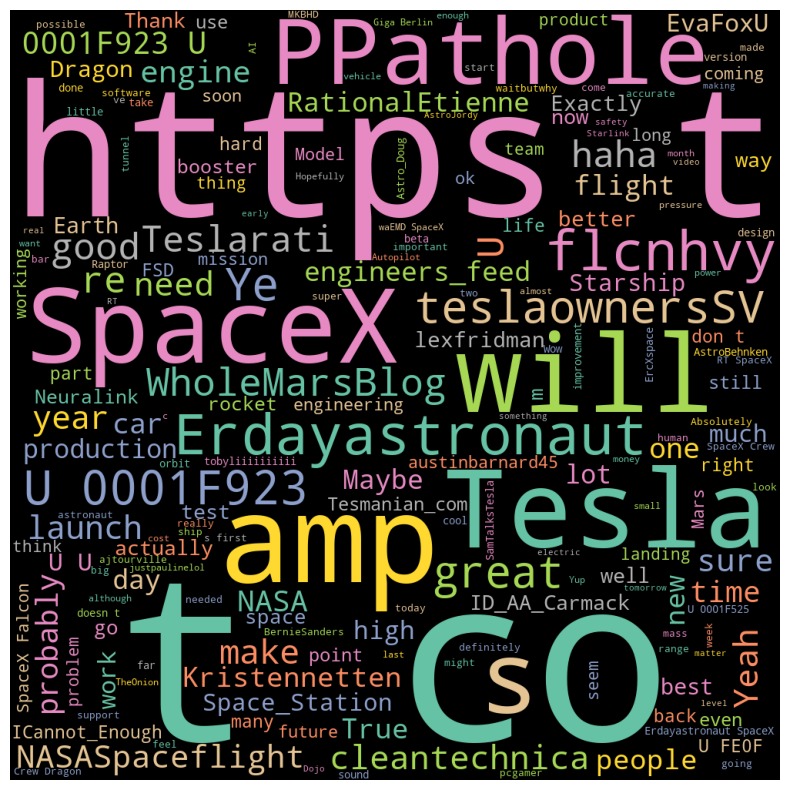

In [70]:
pair_plot(wordcloud)